# Google Colab

Zero configuration means of getting up and running with R: https://colab.research.google.com/notebook#create=true&language=r

# Introduction to Machine Learning in R - [YouTube Playlist](https://www.youtube.com/playlist?list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg)

* [K-Nearest Neighbors (KNN) Algorithm](#knn)
* [Multinomial Logistic Regression](#logistic_regression)
* [Bayes Theorem](#bayes)
* [Naive Bayes Classifier](#naive)
* [Neural Networks](#neural_networks)
* [Support Vector Machines](#svm)
* [Decision Tree](#tree)
* [Random Forest](#random_forest)
* [AdaBoost](#adaboost)
* [Clustering (k-means)](#clustering)
* [Principal Component Analysis (PCA)](#pca)
* [Linear Discriminant Analysis (LDA)](#lda)

![](https://d33wubrfki0l68.cloudfront.net/571b056757d68e6df81a3e3853f54d3c76ad6efc/32d37/diagrams/data-science.png)

<a id='knn'></a>

# K-Nearest Neighbors (KNN) Algorithm - [YouTube Video](https://www.youtube.com/watch?v=SDNkfcovE9E&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=1)

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)

## Iris Data

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.3
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [2]:
df_iris <- as_tibble(iris)
head(df_iris)
print(str_c("number of observations: ", dim(df_iris)[[1]]))
print(str_c("number of variables: ", dim(df_iris)[[2]]))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


[1] "number of observations: 150"
[1] "number of variables: 5"


In [3]:
summary(df_iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [4]:
df_iris_train <- df_iris %>% sample_frac(.70)
df_iris_test  <- anti_join(df_iris, df_iris_train)

Joining, by = c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species")


In [5]:
df_iris_mean <- df_iris_train[,1:4] %>% map(mean)
df_iris_sd <- df_iris_train[,1:4] %>% map(sd)
df_iris_train[,1:4] <- (df_iris_train[,1:4] - df_iris_mean)/df_iris_sd
df_iris_test[,1:4] <- (df_iris_test[,1:4] - df_iris_mean)/df_iris_sd

In [6]:
head(df_iris_train)
print(str_c("number of observations: ", dim(df_iris_train)[[1]]))
print(str_c("number of variables: ", dim(df_iris_train)[[2]]))
summary(df_iris_train)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-1.22318141,-0.1999803,-1.3151011,-1.4243044,setosa
0.66208902,-0.6940493,1.0187403,1.2761179,virginica
1.13340663,-0.6940493,0.5741991,0.2473856,versicolor
-1.57666962,-1.9292218,-1.3706687,-1.1671213,setosa
0.07294201,-0.1999803,0.2407932,0.3759772,versicolor
0.30860081,-0.1999803,0.6297667,0.7617518,virginica


[1] "number of observations: 105"
[1] "number of variables: 5"


  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.69450   Min.   :-2.1763   Min.   :-1.5374   Min.   :-1.4243  
 1st Qu.:-0.86969   1st Qu.:-0.6940   1st Qu.:-1.2040   1st Qu.:-1.1671  
 Median :-0.04489   Median :-0.2000   Median : 0.2408   Median : 0.1188  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.66209   3rd Qu.: 0.7882   3rd Qu.: 0.7409   3rd Qu.: 0.7618  
 Max.   : 2.42953   Max.   : 2.5174   Max.   : 1.7411   Max.   : 1.6619  
       Species  
 setosa    :36  
 versicolor:33  
 virginica :36  
                
                
                

In [7]:
head(df_iris_test)
print(str_c("number of observations: ", dim(df_iris_test)[[1]]))
print(str_c("number of variables: ", dim(df_iris_test)[[2]]))
summary(df_iris_test)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.86969320,1.03519217,-1.315101,-1.295713,setosa
-1.10535201,-0.19998031,-1.315101,-1.295713,setosa
-1.69449902,-0.44701480,-1.315101,-1.295713,setosa
-1.10535201,0.04705419,-1.259533,-1.424304,setosa
-1.81232842,-0.19998031,-1.481804,-1.424304,setosa
-0.04488739,2.27036465,-1.426236,-1.295713,setosa


[1] "number of observations: 44"
[1] "number of variables: 5"


  Sepal.Length       Sepal.Width       Petal.Length       Petal.Width      
 Min.   :-1.81233   Min.   :-2.6703   Min.   :-1.48180   Min.   :-1.42430  
 1st Qu.:-0.75186   1st Qu.:-0.9411   1st Qu.:-1.25953   1st Qu.:-1.19927  
 Median : 0.01403   Median :-0.2000   Median : 0.37971   Median : 0.11879  
 Mean   : 0.02206   Mean   :-0.1775   Mean   :-0.03326   Mean   :-0.05656  
 3rd Qu.: 0.69155   3rd Qu.: 0.2941   3rd Qu.: 0.64366   3rd Qu.: 0.76175  
 Max.   : 2.19387   Max.   : 3.2585   Max.   : 1.29658   Max.   : 1.66189  
       Species  
 setosa    :14  
 versicolor:17  
 virginica :13  
                
                
                

In [8]:
library(class)

In [9]:
pr <- knn(df_iris_train[,1:4],
          df_iris_test[,1:4],
          cl=df_iris_train$Species,
          k=10)

In [10]:
pr

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor virginica  versicolor versicolor
[31] versicolor virginica  versicolor virginica  virginica  virginica 
[37] virginica  virginica  virginica  versicolor virginica  virginica 
[43] virginica  virginica 
Levels: setosa versicolor virginica

In [11]:
tab <- table(pr,df_iris_test$Species)

In [12]:
# confusion matrix
tab

            
pr           setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         16         2
  virginica       0          1        11

In [13]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 93.18182

## Diamonds Data

![](https://i.imgur.com/Bbf0GWk.jpg)

In [14]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
0.23,Very Good,H,VS1,59.4,61,338,4.00,4.05,2.39


In [15]:
df_diamonds <- diamonds %>% 
mutate(lprice = log(price), lcarat = log(carat)) %>%
select(-color, -clarity, -price, -carat)
head(df_diamonds)
print(str_c("number of observations: ", dim(df_diamonds)[[1]]))
print(str_c("number of variables: ", dim(df_diamonds)[[2]]))

cut,depth,table,x,y,z,lprice,lcarat
Ideal,61.5,55,3.95,3.98,2.43,5.786897,-1.469676
Premium,59.8,61,3.89,3.84,2.31,5.786897,-1.560648
Good,56.9,65,4.05,4.07,2.31,5.789960,-1.469676
Premium,62.4,58,4.20,4.23,2.63,5.811141,-1.237874
Good,63.3,58,4.34,4.35,2.75,5.814131,-1.171183
Very Good,62.8,57,3.94,3.96,2.48,5.817111,-1.427116


[1] "number of observations: 53940"
[1] "number of variables: 8"


In [16]:
summary(df_diamonds)

        cut            depth           table             x         
 Fair     : 1610   Min.   :43.00   Min.   :43.00   Min.   : 0.000  
 Good     : 4906   1st Qu.:61.00   1st Qu.:56.00   1st Qu.: 4.710  
 Very Good:12082   Median :61.80   Median :57.00   Median : 5.700  
 Premium  :13791   Mean   :61.75   Mean   :57.46   Mean   : 5.731  
 Ideal    :21551   3rd Qu.:62.50   3rd Qu.:59.00   3rd Qu.: 6.540  
                   Max.   :79.00   Max.   :95.00   Max.   :10.740  
       y                z              lprice          lcarat        
 Min.   : 0.000   Min.   : 0.000   Min.   :5.787   Min.   :-1.60944  
 1st Qu.: 4.720   1st Qu.: 2.910   1st Qu.:6.856   1st Qu.:-0.91629  
 Median : 5.710   Median : 3.530   Median :7.784   Median :-0.35667  
 Mean   : 5.735   Mean   : 3.539   Mean   :7.787   Mean   :-0.39497  
 3rd Qu.: 6.540   3rd Qu.: 4.040   3rd Qu.:8.580   3rd Qu.: 0.03922  
 Max.   :58.900   Max.   :31.800   Max.   :9.843   Max.   : 1.61144  

In [17]:
df_diamonds_train <- df_diamonds %>% sample_frac(.70)
df_diamonds_test  <- anti_join(df_diamonds, df_diamonds_train)

Joining, by = c("cut", "depth", "table", "x", "y", "z", "lprice", "lcarat")


In [18]:
df_diamonds_mean <- df_diamonds_train[,-1] %>% map(mean)
df_diamonds_sd <- df_diamonds_train[,-1] %>% map(sd)
df_diamonds_train[,-1] <- (df_diamonds_train[,-1] - df_diamonds_mean)/df_diamonds_sd
df_diamonds_test[,-1] <- (df_diamonds_test[,-1] - df_diamonds_mean)/df_diamonds_sd

In [19]:
head(df_diamonds_train)
print(str_c("number of observations: ", dim(df_diamonds_train)[[1]]))
print(str_c("number of variables: ", dim(df_diamonds_train)[[2]]))
summary(df_diamonds_train)

cut,depth,table,x,y,z,lprice,lcarat
Ideal,-0.1736881,-0.2038144,-0.5510652,-0.49831659,-0.53090467,-0.3493041,-0.47171983
Premium,-0.5205280,1.1459240,-1.1224801,-1.14470969,-1.16534306,-0.9350920,-1.21602789
Ideal,0.5893595,-1.5535527,-1.2653338,-1.23206011,-1.17944169,-1.0949238,-1.37898951
Very Good,0.7280954,-0.2038144,-0.0778622,-0.05282944,0.01894193,-0.2603334,0.09397568
Very Good,1.0749352,-0.2038144,-0.5867786,-0.55072684,-0.44631289,-0.2386376,-0.47171983
Ideal,-0.2430561,0.2460984,0.6631915,0.68964912,0.63928169,0.6765993,0.71342516


[1] "number of observations: 37758"
[1] "number of variables: 8"


        cut            depth               table               x           
 Fair     : 1135   Min.   :-13.00676   Min.   :-6.5026   Min.   :-5.11346  
 Good     : 3418   1st Qu.: -0.52053   1st Qu.:-0.6537   1st Qu.:-0.90820  
 Very Good: 8510   Median :  0.03442   Median :-0.2038   Median :-0.03322  
 Premium  : 9618   Mean   :  0.00000   Mean   : 0.0000   Mean   : 0.00000  
 Ideal    :15077   3rd Qu.:  0.51999   3rd Qu.: 0.6960   3rd Qu.: 0.72569  
                   Max.   : 11.96571   Max.   : 9.6943   Max.   : 4.47560  
       y                  z                lprice              lcarat        
 Min.   :-5.00560   Min.   :-4.98607   Min.   :-1.965537   Min.   :-2.07226  
 1st Qu.:-0.88266   1st Qu.:-0.88337   1st Qu.:-0.917211   1st Qu.:-0.88711  
 Median :-0.02662   Median :-0.02335   Median :-0.004088   Median : 0.06972  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.000000   Mean   : 0.00000  
 3rd Qu.: 0.70712   3rd Qu.: 0.69568   3rd Qu.: 0.783990   3rd Qu.: 0.74663  


In [20]:
head(df_diamonds_test)
print(str_c("number of observations: ", dim(df_diamonds_test)[[1]]))
print(str_c("number of variables: ", dim(df_diamonds_test)[[2]]))
summary(df_diamonds_test)

cut,depth,table,x,y,z,lprice,lcarat
Premium,0.4506235,0.2460984,-1.363546,-1.310675,-1.278132,-1.941657,-1.436954
Very Good,0.7280954,-0.2038144,-1.595683,-1.546522,-1.489612,-1.935776,-1.760521
Very Good,0.3812556,-0.2038144,-1.586755,-1.529052,-1.503710,-1.935776,-1.760521
Premium,-0.9367358,1.5958368,-1.649253,-1.651342,-1.701091,-1.918342,-1.909293
Good,1.0749352,-0.6537272,-1.309976,-1.249530,-1.165343,-1.892756,-1.378990
Very Good,1.4217751,-1.1036400,-1.676038,-1.581462,-1.489612,-1.889954,-1.833290


[1] "number of observations: 16094"
[1] "number of variables: 8"


        cut           depth               table                 x           
 Fair     : 470   Min.   :-7.596060   Min.   :-6.052681   Min.   :-5.11346  
 Good     :1476   1st Qu.:-0.451160   1st Qu.:-0.653727   1st Qu.:-0.89034  
 Very Good:3567   Median : 0.034416   Median :-0.203814   Median :-0.01536  
 Premium  :4152   Mean   :-0.003031   Mean   : 0.007634   Mean   : 0.01343  
 Ideal    :6429   3rd Qu.: 0.519992   3rd Qu.: 0.696011   3rd Qu.: 0.72569  
                  Max.   : 6.832476   Max.   :16.892872   Max.   : 3.93990  
       y                   z                 lprice             lcarat        
 Min.   :-5.005598   Min.   :-4.986072   Min.   :-1.94166   Min.   :-2.07225  
 1st Qu.:-0.873923   1st Qu.:-0.869272   1st Qu.:-0.89352   1st Qu.:-0.88711  
 Median :-0.000419   Median :-0.009255   Median : 0.02637   Median : 0.09398  
 Mean   : 0.013506   Mean   : 0.011768   Mean   : 0.01684   Mean   : 0.01614  
 3rd Qu.: 0.707119   3rd Qu.: 0.709775   3rd Qu.: 0.79188   3rd Qu

In [21]:
pr <- knn(df_diamonds_train[,-1],
          df_diamonds_test[,-1],
          cl=df_diamonds_train$cut,
          k=10)

In [22]:
tab <- table(pr,df_diamonds_test$cut)

In [23]:
tab

           
pr          Fair Good Very Good Premium Ideal
  Fair       342   40         1       0     4
  Good       105  891       229      46    18
  Very Good    8  351      1365     496   273
  Premium     10  157      1098    3170   323
  Ideal        5   37       874     440  5811

In [24]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 71.94607

<a id='logistic_regression'></a>

# Multinomial Logistic Regression - [YouTube Playlist](https://www.youtube.com/playlist?list=PLoEMreTa9CNmedZ40lgowv0jXj_etdoQg)

$$z_1 = \beta_{10} + \beta_{11} x_1 + \beta_{12} x_2 + \beta_{13} x_3 + \beta_{14} x_4$$

$$z_2 = \beta_{20} + \beta_{21} x_1 + \beta_{22} x_2 + \beta_{23} x_3 + \beta_{24} x_4$$

$$p_1 = \exp(z_1)/(\exp(z_1) + \exp(z_2) + 1)$$

$$p_2 = \exp(z_2)/(\exp(z_1) + \exp(z_2) + 1)$$

$$p_3 = 1/(\exp(z_1) + \exp(z_2) + 1)$$

$$p_1 + p_2 + p_3 = 1, 0 \leq p_1, p_2, p_3 \leq 1$$

$$-\log p_{y^n}(x_1^n,x_2^n,x_3^n,x_4^n), y^n \in \{1,2,3\}$$

## Iris Data

In [25]:
library(nnet)

In [26]:
model <- nnet::multinom(Species ~ ., data = df_iris_train)

# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 8.653256
iter  20 value 4.749497
iter  30 value 4.731532
iter  40 value 4.725306
iter  50 value 4.722375
iter  60 value 4.721492
iter  70 value 4.721062
iter  80 value 4.720557
iter  90 value 4.720186
iter 100 value 4.719866
final  value 4.719866 
stopped after 100 iterations


In [27]:
summary(model)

Call:
nnet::multinom(formula = Species ~ ., data = df_iris_train)

Coefficients:
           (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width
versicolor    7.549816   -0.4432202   -3.058487     9.768772    6.749702
virginica    -7.926252   -2.7635263   -4.429457    24.292826   17.926796

Std. Errors:
           (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width
versicolor    68.49856     158.0063    70.90734     190.3007    162.9388
virginica     68.94940     158.0356    70.92775     190.5658    163.0679

Residual Deviance: 9.439732 
AIC: 29.43973 

In [28]:
probs <- model %>% predict(df_iris_test, type='prob')
probs[1:5,]

setosa,versicolor,virginica
1.0000000,4.939397e-08,4.442845e-29
0.9999976,2.397145e-06,2.025731e-26
0.9999934,6.625646e-06,3.082353e-25
0.9999992,8.135087e-07,2.608954e-27
0.9999997,2.701411e-07,2.484150e-28


In [29]:
pr <- model %>% predict(df_iris_test)

In [30]:
pr

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor virginica  versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] versicolor virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica 
Levels: setosa versicolor virginica

In [31]:
tab <- table(pr,df_iris_test$Species)

In [32]:
tab

            
pr           setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         16         0
  virginica       0          1        13

In [33]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 97.72727

## Diamonds Data

In [34]:
model <- nnet::multinom(cut ~ ., data = df_diamonds_train)

# weights:  45 (32 variable)
initial  value 60769.156698 
iter  10 value 41533.933585
iter  20 value 39349.695093
iter  30 value 37677.019682
iter  40 value 37416.909111
iter  50 value 37414.834845
iter  60 value 37414.338306
final  value 37414.308675 
converged


In [35]:
summary(model)

Call:
nnet::multinom(formula = cut ~ ., data = df_diamonds_train)

Coefficients:
          (Intercept)       depth      table          x         y          z
Good         2.462033 -0.06219791 -0.3084816 -19.462552 24.209865 -3.8448401
Very Good    3.796758 -1.12826742 -0.9688116 -24.701969 26.286773  0.3934613
Premium      3.696590 -1.00369372 -0.7115395   1.015085  4.547164 -3.5457263
Ideal        3.908158 -1.52298351 -2.9834396 -14.411905 19.397137 -3.0444973
             lprice    lcarat
Good      0.8342814 -1.397480
Very Good 2.0412456 -3.537223
Premium   2.1954561 -4.308658
Ideal     3.2303843 -4.941278

Std. Errors:
          (Intercept)     depth      table         x        y         z
Good       0.07196572 0.1248257 0.04227084 0.9615580 1.041147 0.9572790
Very Good  0.06982981 0.1150300 0.04259252 0.9232476 0.987905 0.8843322
Premium    0.06974673 0.1245583 0.04099890 0.9058302 0.984481 0.9551178
Ideal      0.06995577 0.1266247 0.04686858 0.9518418 1.029568 0.9712601
          

In [36]:
probs <- model %>% predict(df_diamonds_test, type='prob')
probs[1:5,]

Fair,Good,Very Good,Premium,Ideal
0.022739968,0.26812599,0.4113340,0.2023050,0.09549504
0.009595209,0.13817189,0.3604308,0.2079664,0.28383562
0.005237074,0.10437154,0.3673313,0.1846550,0.33840515
0.009610600,0.05564369,0.1592172,0.7556333,0.01989525
0.013903974,0.20075796,0.3716724,0.1016541,0.31201162


In [37]:
pr <- model %>% predict(df_diamonds_test)
pr[1:5]

[1] Very Good Very Good Very Good Premium   Very Good
Levels: Fair Good Very Good Premium Ideal

In [38]:
tab <- table(pr,df_diamonds_test$cut)

In [39]:
tab

           
pr          Fair Good Very Good Premium Ideal
  Fair       230   64        17       7     4
  Good        72  201        92      12     0
  Very Good   33  478      1617     734   476
  Premium     92  395       610    2922   376
  Ideal       43  338      1231     477  5573

In [40]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 65.50889

<a id='bayes'></a>

# Bayes Theorem - [YouTube Video](https://www.youtube.com/watch?v=95jlcgqPYPM&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=5)

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Capture.jpg1.jpg)

$$p(A,B) = p(A|B)p(B)$$

$$p(A,B) = p(B|A)p(A)$$

1) Suppose, a particular test for whether someone has covid is 90% sensitive, meaning the true positive rate (TPR)=0.90. Therefore it leads to 90% true positive results (correct identification of covid) for infected patients.

2) The test is also 80% specific, meaning true negative rate (TNR)=0.80. Therefore the test correctly identifies 80% of covid-negative for not-infected, but also generates 20% false positives, or false positive rate (FPR)=0.20, for not-infected.

3) Assuming 0.05 prevalence, meaning 5% of people are infected, what is the probability that a random person who tests positive is really infected?

$$p(\text{infected} | \text{positive}) = \frac{p(\text{positive} | \text{infected}) p(\text{infected})}{p(\text{positive})}$$

$$p(\text{positive}) = p(\text{positive} | \text{infected}) p(\text{infected}) + p(\text{positive} | \text{not-infected}) p(\text{not-infected})$$

$$p(\text{infected} | \text{positive}) = \frac{0.9 \times 0.05}{0.9 \times 0.05 + 0.2 \times 0.95} \approx 19\%$$

<a id='naive'></a>

# Naive Bayes Classifier - [YouTube Playlist](https://www.youtube.com/playlist?list=PLoEMreTa9CNlqh4MQcZR1t-ya8cU931gM)

$$p(C_k|x_1, x_2,x_3,x_4) = \frac{p(x_1, x_2,x_3,x_4|C_k)p(C_k)}{p(x_1, x_2,x_3,x_4)}, k = 1, \ldots, K$$

$$p(x_1, x_2,x_3,x_4|C_k)p(C_k) = p(x_1,x_2,x_3,x_4,C_k)$$

$$p(x_1,x_2,x_3,x_4,C_k) = p(x_1|x_2,x_3,x_4,C_k)p(x_2,x_3,x_4,C_k)$$

$$p(x_2,x_3,x_4,C_k) = p(x_2|x_3,x_4,C_k)p(x_3,x_4,C_k)$$

$$p(x_3,x_4,C_k) = p(x_3|x_4,C_k)p(x_4,C_k)$$

$$p(x_4,C_k) = p(x_4|C_k)p(C_k)$$

## Naive Assumption

$$p(x_1|x_2,x_3,x_4,C_k) = p(x_1|C_k)$$

$$p(x_2|x_3,x_4,C_k) = p(x_2|C_k)$$

$$p(x_3|x_4,C_k) = p(x_3|C_k)$$

$$p(C_k|x_1, x_2,x_3,x_4) = \frac{1}{Z} p(x_1|C_k)p(x_2|C_k)p(x_3|C_k)p(x_4|C_k)p(C_k), k = 1, \ldots, K$$

$$\hat{y} = \arg \max_{k\in \{1, \ldots, K\}} p(x_1|C_k)p(x_2|C_k)p(x_3|C_k)p(x_4|C_k)p(C_k)$$

$$p(x|C_k) = \mathcal{N}(\mu_k, \sigma_k)$$

In [41]:
library(e1071)

## Iris Data

In [42]:
model <- naiveBayes(Species ~ ., data = df_iris_train)

In [43]:
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    setosa versicolor  virginica 
 0.3428571  0.3142857  0.3428571 

Conditional probabilities:
            Sepal.Length
Y                   [,1]      [,2]
  setosa     -1.02025300 0.3700573
  versicolor  0.08008319 0.6079496
  virginica   0.94684341 0.7055020

            Sepal.Width
Y                  [,1]      [,2]
  setosa      0.8156060 0.8156474
  versicolor -0.7314788 0.6935722
  virginica  -0.1450838 0.8099269

            Petal.Length
Y                  [,1]      [,2]
  setosa     -1.2657076 0.1027006
  versicolor  0.2609996 0.2707384
  virginica   1.0264580 0.3132565

            Petal.Width
Y                  [,1]      [,2]
  setosa     -1.2242731 0.1423478
  versicolor  0.1499678 0.2273887
  virginica   1.0868026 0.3551497


In [44]:
pr <- predict(model, df_iris_test[,1:4], type="class")

In [45]:
tab <- table(pr,df_iris_test$Species)

In [46]:
tab

            
pr           setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         15         2
  virginica       0          2        11

In [47]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 90.90909

## Diamonds Data

In [48]:
model <- naiveBayes(cut ~ ., data = df_diamonds_train)

In [49]:
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
      Fair       Good  Very Good    Premium      Ideal 
0.03005985 0.09052386 0.22538270 0.25472747 0.39930611 

Conditional probabilities:
           depth
Y                  [,1]      [,2]
  Fair       1.60909912 2.5979939
  Good       0.43256108 1.4931316
  Very Good  0.05138686 0.9514629
  Premium   -0.34288885 0.8060990
  Ideal     -0.02946332 0.5012721

           table
Y                 [,1]      [,2]
  Fair       0.7237988 1.7337436
  Good       0.5520075 1.2692207
  Very Good  0.2217471 0.9488509
  Premium    0.5830746 0.6636463
  Ideal     -0.6767495 0.5594098

           x
Y                   [,1]      [,2]
  Fair       0.498854678 0.8612339
  Good       0.083770342 0.9387721
  Very Good  0.003485532 0.9836300
  Premium    0.215702369 1.0579611
  Ideal     -0.196114237 0.9488708

           y
Y                  [,1]      [,2]
  Fair       0.42

In [50]:
pr <- predict(model, df_diamonds_test[,-1], type="class")

In [51]:
tab <- table(pr,df_diamonds_test$cut)

In [52]:
tab

           
pr          Fair Good Very Good Premium Ideal
  Fair       249  237        83      29    31
  Good       187  232       125      47     3
  Very Good   20  542       796     583   161
  Premium      9  238      1273    2602   857
  Ideal        5  227      1290     891  5377

In [53]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 57.51212

<a id='neural_networks'></a>

# Neural Networks - [YouTube Video](https://www.youtube.com/watch?v=xcEDJTaxrH4&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=7)

$$z_1 = \beta_{10} + \beta_{11} x_1 + \beta_{12} x_2 + \beta_{13} x_3 + \beta_{14} x_4$$

$$z_2 = \beta_{20} + \beta_{21} x_1 + \beta_{22} x_2 + \beta_{23} x_3 + \beta_{24} x_4$$

$$z_3 = \beta_{30} + \beta_{31} x_1 + \beta_{32} x_2 + \beta_{33} x_3 + \beta_{34} x_4$$

$$p_1 = \exp(z_1)/(\exp(z_1) + \exp(z_2) + \exp(z_3))$$

$$p_2 = \exp(z_2)/(\exp(z_1) + \exp(z_2) + \exp(z_3))$$

$$p_3 = \exp(z_3)/(\exp(z_1) + \exp(z_2) + \exp(z_3))$$

$$p_1 + p_2 + p_3 = 1, 0 \leq p_1, p_2, p_3 \leq 1$$

$$-\log p_{y^n}(x_1^n,x_2^n,x_3^n,x_4^n), y^n \in \{1,2,3\}$$

$$ \sum_{n=1}^{N_b} -\log p_{y^n}(x_1^n,x_2^n,x_3^n,x_4^n)$$

<img src="https://miro.medium.com/max/2500/1*ZB6H4HuF58VcMOWbdpcRxQ.png" width="400">

$$z_1 = W_{10}^o + W_{11}^o h_1^2 + \ldots + W_{17}^o h_7^2$$

$$z_2 = W_{20}^o + W_{21}^o h_1^2 + \ldots + W_{27}^o h_7^2$$

$$z_3 = W_{30}^o + W_{31}^o h_1^2 + \ldots + W_{37}^o h_7^2$$

$$h_1^2 = \max(W_{10}^2 + W_{11}^2 h_1^1 + \ldots + W_{15}^2 h_5^1, 0)$$

$$\vdots$$

$$h_7^2 = \max(W_{70}^2 + W_{71}^2 h_1^1 + \ldots + W_{75}^2 h_5^1,0)$$

$$h_1^1 = \max(W_{10}^1 + W_{11}^1 x_1 + \ldots + W_{14}^1 x_4,0)$$

$$\vdots$$

$$h_5^1 = \max(W_{50}^1 + W_{51}^1 x_1 + \ldots + W_{54}^1 x_4,0)$$

In [54]:
library(keras)

In [55]:
model <- keras_model_sequential()
model %>% 
  layer_dense(input_shape = 7, units = 128, activation = 'relu') %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 5, activation = 'softmax')

In [56]:
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 128)                     1024        
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     16512       
________________________________________________________________________________
dense_2 (Dense)                     (None, 5)                       645         
Total params: 18,181
Trainable params: 18,181
Non-trainable params: 0
________________________________________________________________________________



In [57]:
model %>% compile(
  optimizer = 'adam', 
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

In [58]:
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 128)                     1024        
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     16512       
________________________________________________________________________________
dense_2 (Dense)                     (None, 5)                       645         
Total params: 18,181
Trainable params: 18,181
Non-trainable params: 0
________________________________________________________________________________



In [59]:
model %>% fit(as.matrix(df_diamonds_train[,-1]),
              c(df_diamonds_train$cut) - 1,
              epochs = 100, verbose = 2,
              batch_size = 100)

In [60]:
pr <- (model %>% predict_classes(as.matrix(df_diamonds_test[,-1])))+1

In [61]:
tab <- table(pr,df_diamonds_test$cut)

In [62]:
tab

   
pr  Fair Good Very Good Premium Ideal
  1  384   16         1       1     5
  2   64 1108       331       0    23
  3    7  309      2182     435   302
  4   13   17       274    3276   206
  5    2   26       779     440  5893

In [63]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 79.79993

<a id='svm'></a>

# Support Vector Machines (SVM) - [YouTube Video](https://www.youtube.com/watch?v=FZ8BRcVtqMQ&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=8)

![](https://fderyckel.github.io/machinelearningwithr/otherpics/svm1.png)

$$w = (w_1, w_2, \ldots, w_d)$$

$$\|w\|^2 = w_1^2 + w_2^2 + \ldots + w_d^2$$

$$\text{margin} = 2/\|w\|$$

$$\frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w^T x_i + b) ) + \lambda \|w\|^2$$

$$1 - y_i (w^T x_i + b) \leq 0$$

If $y_i = 1$ then $(w^T x_i + b) \geq 1$.

If $y_i = -1$ then $(w^T x_i + b) \leq -1$.

In [64]:
model <- svm(cut ~ ., data = df_diamonds_train)

In [65]:
dim(df_diamonds_train)

[1] 37758     8

In [66]:
model


Call:
svm(formula = cut ~ ., data = df_diamonds_train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  23245


In [67]:
pr <- model %>% predict(df_diamonds_test[,-1])

In [68]:
tab <- table(pr,df_diamonds_test$cut)

In [69]:
tab

           
pr          Fair Good Very Good Premium Ideal
  Fair       356   39         2       1     7
  Good        91  886       229      22    10
  Very Good    9  435      1706     335   233
  Premium     11   83       710    3313   276
  Ideal        3   33       920     481  5903

In [70]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 75.58096

<a id='tree'></a>

# Decision Tree - [YouTube Video](https://www.youtube.com/watch?v=MfYf9pFDXtc&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=9)

![](https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc)

In [71]:
library(rpart)
library(rpart.plot)

In [72]:
model <- rpart(cut ~ ., data = df_diamonds_train)

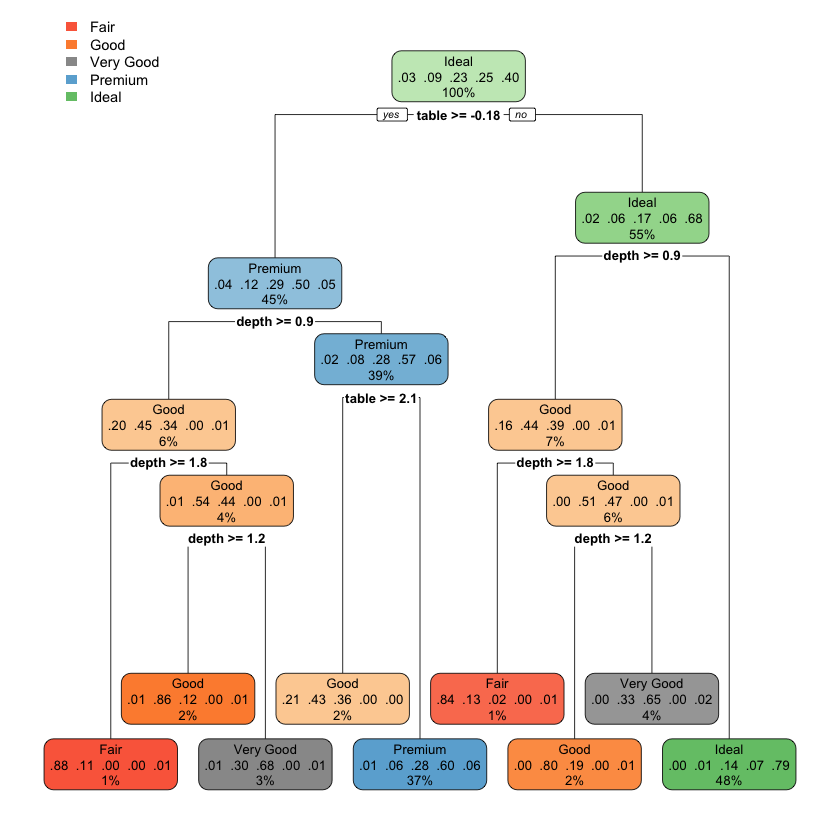

In [73]:
rpart.plot(model)

In [74]:
pr <- model %>% predict(df_diamonds_test, type = 'class')

In [75]:
tab <- table(pr,df_diamonds_test$cut)

In [76]:
tab

           
pr          Fair Good Very Good Premium Ideal
  Fair       349   45         5       0     4
  Good        73  764       223       0     9
  Very Good    5  300       662       0    25
  Premium     34  319      1626    3656   371
  Ideal        9   48      1051     496  6020

In [77]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 71.15074

<a id='random_forest'></a>

# Random Forest - [YouTube Video](https://www.youtube.com/watch?v=qbQEUljJzps&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=10)

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png)

In [78]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [79]:
model <- randomForest(cut ~ ., data=df_diamonds_train)

In [80]:
model


Call:
 randomForest(formula = cut ~ ., data = df_diamonds_train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 21.71%
Confusion matrix:
          Fair Good Very Good Premium Ideal class.error
Fair       991   84        15      35    10  0.12687225
Good        87 2394       756     135    46  0.29959040
Very Good    3  526      4654    1504  1823  0.45311398
Premium      0   39       752    7762  1065  0.19297151
Ideal       10   25       691     593 13758  0.08748425

In [81]:
pr = model %>% predict(newdata=df_diamonds_test)

In [82]:
tab <- table(pr,df_diamonds_test$cut)

In [83]:
tab

           
pr          Fair Good Very Good Premium Ideal
  Fair       410   35         4       0     4
  Good        39 1055       238      18    15
  Very Good    7  312      1936     305   304
  Premium      9   46       624    3387   271
  Ideal        5   28       765     442  5835

In [84]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 78.43296

<a id='adaboost'></a>

# AdaBoost - [YouTube Video](https://www.youtube.com/watch?v=_4njlixMtzY&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=11)

![](https://miro.medium.com/max/850/0*KYszvMnr3nCtjaGy.png)

In [85]:
library(gbm)
library(ramify)

Loaded gbm 2.1.8

Attaching package: ‘ramify’

The following object is masked from ‘package:purrr’:

    flatten

The following object is masked from ‘package:tidyr’:

    fill

The following object is masked from ‘package:graphics’:

    clip



In [86]:
model <- gbm(cut ~ ., data = df_diamonds_train, distribution = "multinomial")

Warning message:
“Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk.”Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“the condition has length > 1 and only the first element will be used”

In [87]:
print(model)

gbm(formula = cut ~ ., distribution = "multinomial", data = df_diamonds_train)
A gradient boosted model with multinomial loss function.
100 iterations were performed.
There were 7 predictors of which 7 had non-zero influence.


In [88]:
pr = model %>% predict.gbm(newdata = df_diamonds_test, type = "response") %>% argmax()

Using 100 trees...



In [89]:
tab <- table(pr,df_diamonds_test$cut)

In [90]:
tab

   
pr  Fair Good Very Good Premium Ideal
  1  412   47         5       0     4
  2   35  846       160       7     9
  3    9  330      1144     180   155
  4    8  211      1366    3516   363
  5    6   42       892     449  5898

In [91]:
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 73.41867

<a id='clustering'></a>

# Clustering (k-means) - [YouTube Video](https://www.youtube.com/watch?v=Hhah4IJGAcw&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=12)

![](https://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

$$\sum_{x_i \in C_k} (x_i - \mu_k)^2$$

In [92]:
library(cluster)

In [93]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [94]:
model <- kmeans(df_iris[,1:4], centers = 3, nstart = 25)

In [95]:
model

K-means clustering with 3 clusters of sizes 38, 50, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.006000    3.428000     1.462000    0.246000
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 3 1 1 1 1
[112] 1 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 1
[149] 1 3

Within cluster sum of squares by cluster:
[1] 23.87947 15.15100 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

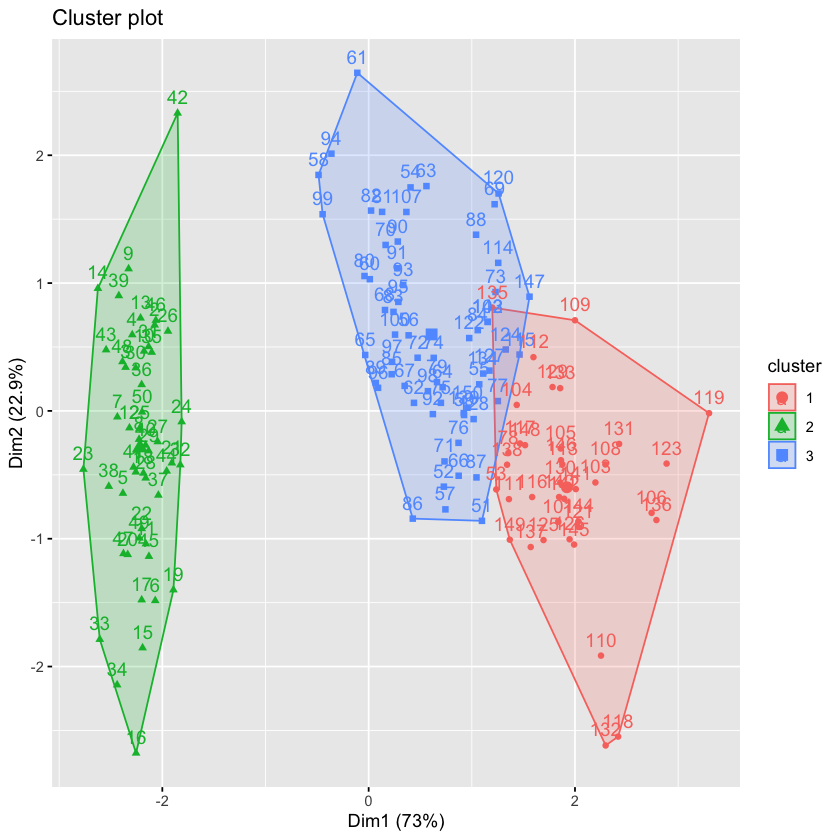

In [96]:
fviz_cluster(model, data = df_iris[,1:4])

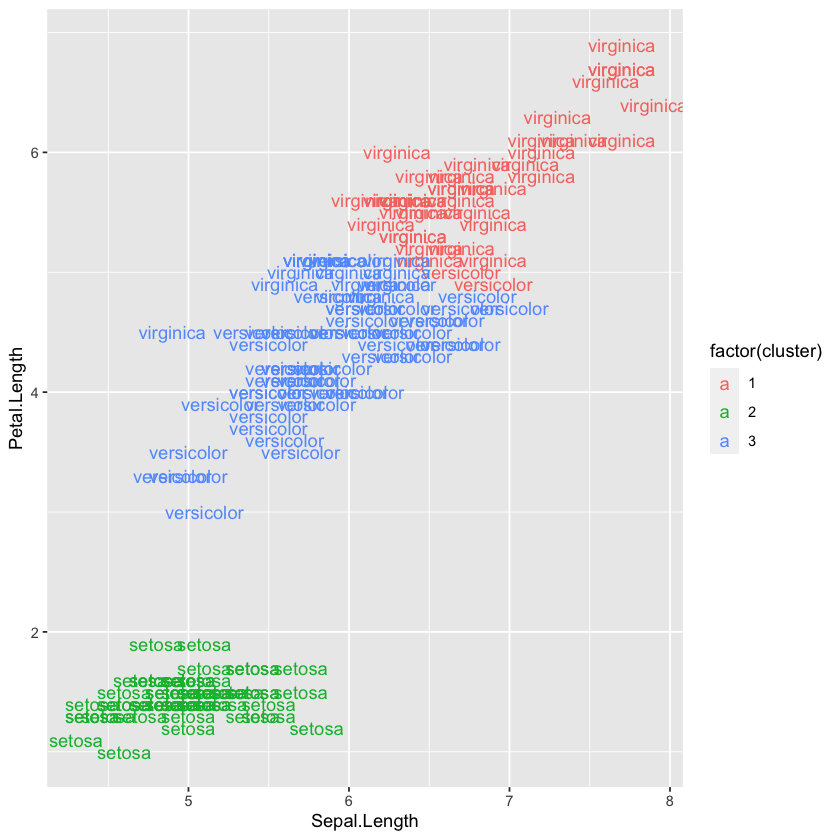

In [97]:
df_iris %>%
mutate(cluster = model$cluster) %>%
ggplot(aes(Sepal.Length, Petal.Length, color = factor(cluster), label = Species)) +
  geom_text()

<a id='pca'></a>

# Principal Component Analysis (PCA) - [YouTube Video](https://www.youtube.com/watch?v=u28Q32cf5Fs&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=13)

![](https://miro.medium.com/max/998/1*V9yJUH9tVrMQI88TuIkCFQ.gif)

$$A = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})(x_i - \bar{x})^T$$

$$A v = \lambda v$$

In [98]:
iris.pr <- prcomp(iris[-5], center = TRUE, scale = TRUE)
summary(iris.pr)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

In [99]:
library(ggfortify)
library(factoextra)

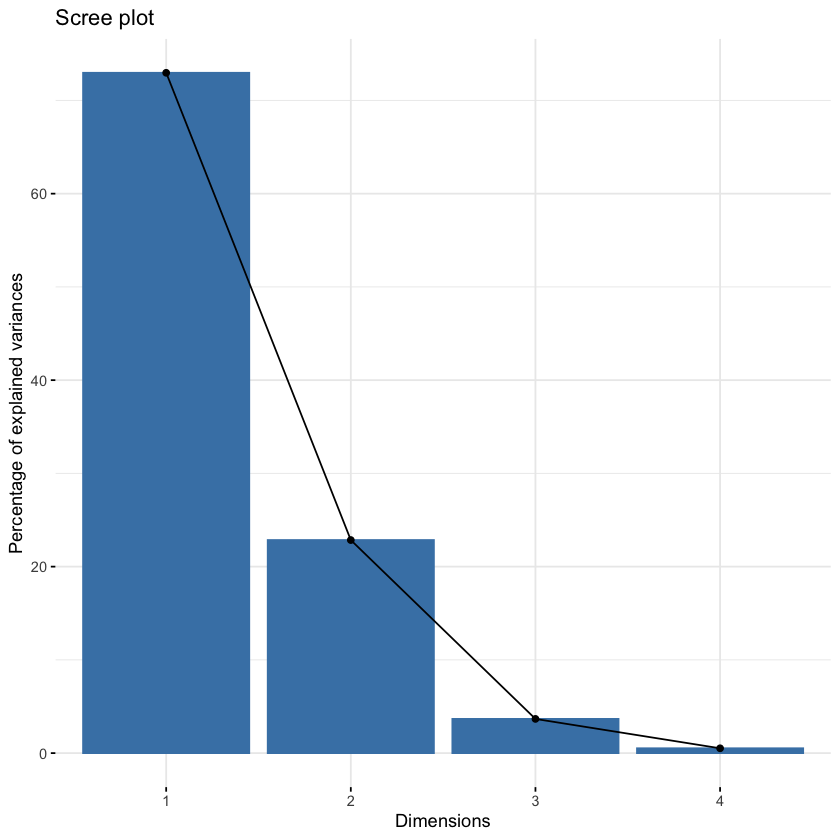

In [100]:
fviz_eig(iris.pr)

Warning message:
“`select_()` is deprecated as of dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

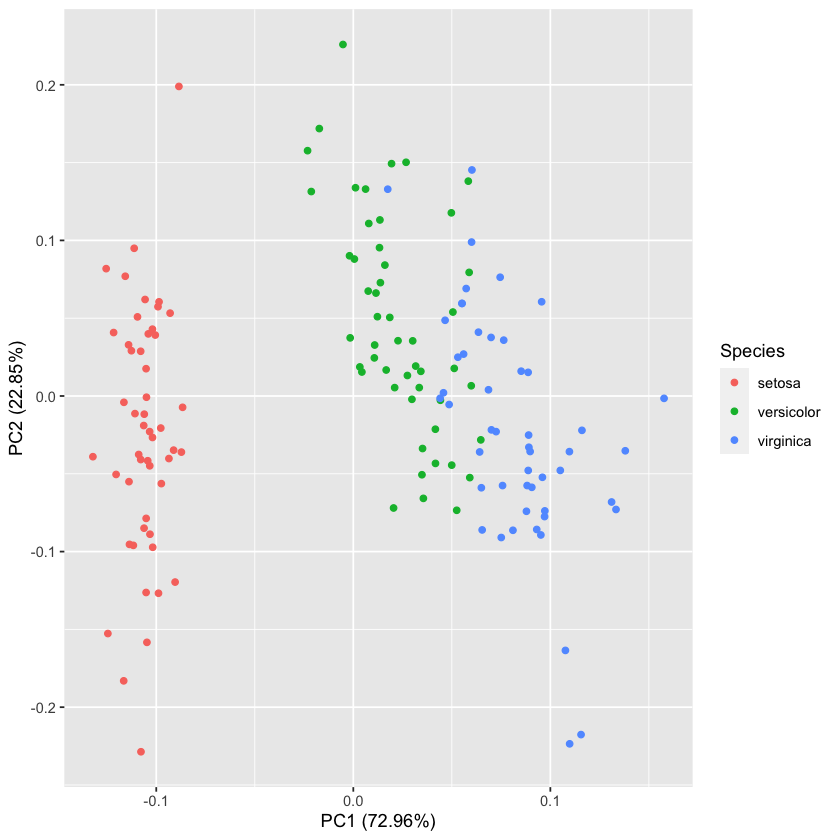

In [101]:
pr.plot <- autoplot(iris.pr, data = iris, colour = 'Species')
pr.plot

<a id='lda'></a>

# Linear Discriminant Analysis (LDA) - [YouTube Video](https://www.youtube.com/watch?v=W7MqnENQwOI&list=PLoEMreTa9CNnNOfZ7wPytm6Nz84XHNbNg&index=14)

![](https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png)

## Within class scatter matrix

$$S_W = \sum_{c=1} S_c$$

$$S_c = \sum_{i \in c} (x_i - \bar{x}_c)(x_i - \bar{x}_c)^T$$

## Between class scatter matrix

$$S_B = \sum_c n_c (\bar{x}_c - \bar{x})(\bar{x}_c - \bar{x})^T$$

## Eigenvalues and Eigenvectors

$$A = S_W^{-1}S_B$$

In [102]:
library(MASS)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [103]:
model <- lda(Species ~ ., data = df_iris_train)

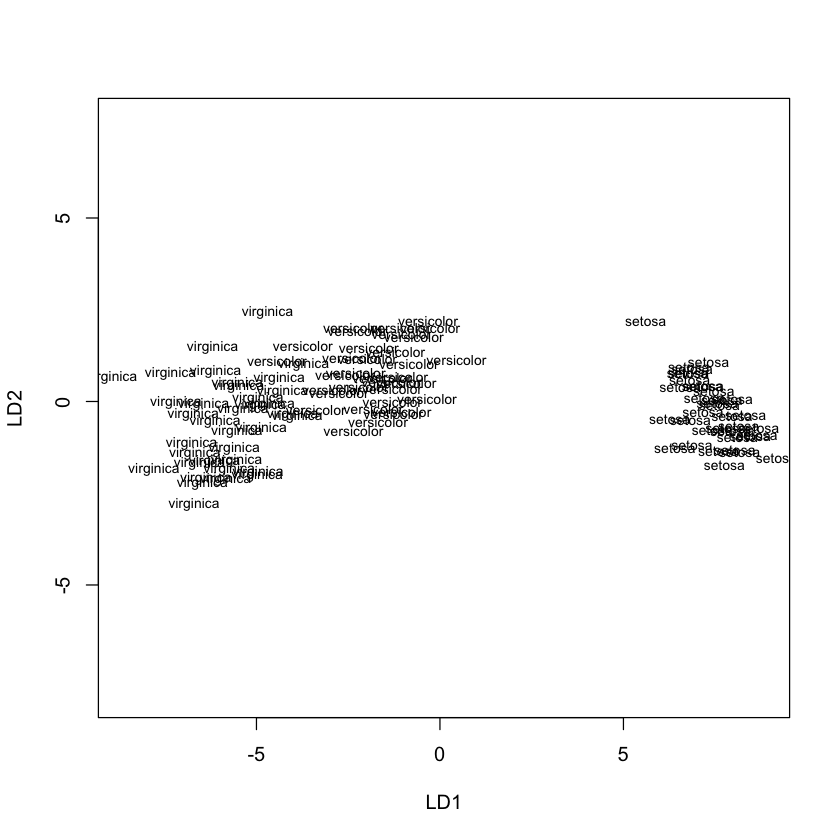

In [104]:
plot(model)

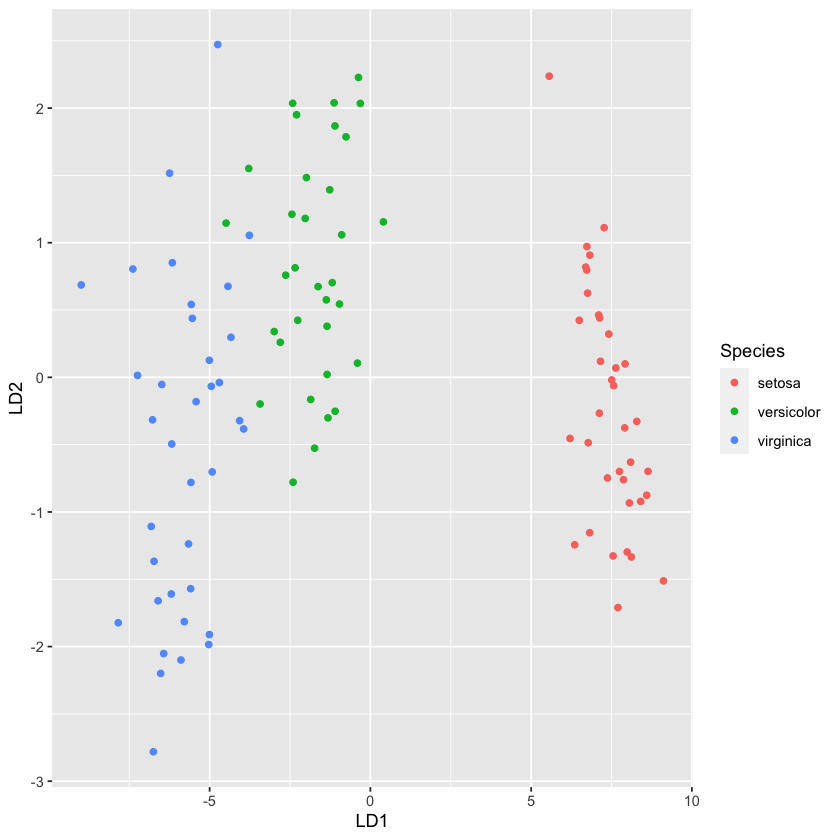

In [105]:
lda.data <- cbind(df_iris_train, predict(model)$x)
ggplot(lda.data, aes(LD1, LD2)) +
  geom_point(aes(color = Species))